# *Inroduction*
Embarking on a Python-powered exploration of taxi data, this analysis taps into the wealth of information generated by urban transportation. Leveraging Python's Pandas, NumPy, and Matplotlib, we delve into patterns and insights, unraveling peak hours, popular routes, and customer behaviors. This project not only seeks to inform taxi service providers but also showcases Python's prowess in handling and visualizing real-world datasets. By distilling raw data into actionable knowledge, we aim to contribute to informed decision-making, enhancing service efficiency, and shedding light on the dynamic landscape of the taxi industry.
# Code Implementation and Simulation

## Importing libraries using python
The analysis employs the following libraries:

Pandas: Facilitating data frame manipulation in a 2D array format, Pandas offers a suite of functions for streamlined analysis tasks.

NumPy: Renowned for its efficiency, NumPy arrays execute rapid computations, especially beneficial for handling large datasets.

Matplotlib / Seaborn: Utilized for visualization, this library enables the creation of informative charts and graphs to enhance data interpretation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Dataset

After the dataset has been downloaded, we utilized the pandas library to import it.

In [ ]:
dataset = pd.read_csv("TaxiDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


To find the shape of the dataset, we can use dataset.shape


In [ ]:
dataset.shape

(1156, 7)

To understand the data more deeply, we need to know about the null values count, datatype, etc. So for that we will use the below code.




In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Preprocessing
Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves cleaning and transforming raw data into a format that can be easily understood and utilized by algorithms.

As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword.

In [ ]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

In [ ]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                     errors='coerce')

Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [ ]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

Once we are done with creating new columns, we can now drop rows with null values.

In [ ]:
dataset.dropna(inplace=True)

It is also important to drop the duplicates rows from the dataset. To do that, refer the code below.

In [ ]:
dataset.drop_duplicates(inplace=True)

## Data Visualization
The code below aims to identify and list unique values for each categorical variable (object) in the dataset.

In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}


The given code utilizes Matplotlib and Seaborn to generate a 2x2 subplot grid, featuring two count plots. These plots illustrate the distribution of the number of individuals in each category (business and personal) and the various purposes for which taxi services were employed.

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

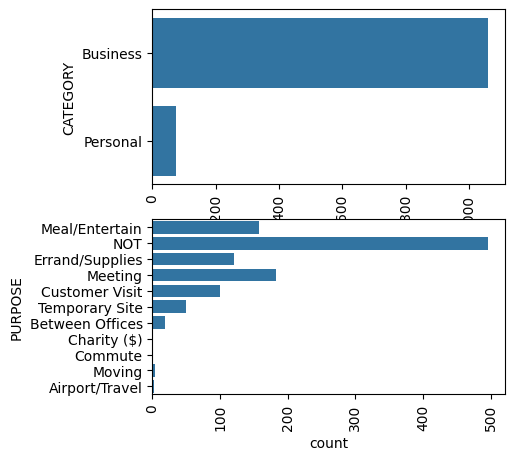

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

Let's replicate a similar visualization approach for the 'time' column, utilizing the previously extracted time information. This section aims to depict the count of individuals at different time intervals, specifically morning, afternoon, evening, and night.

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

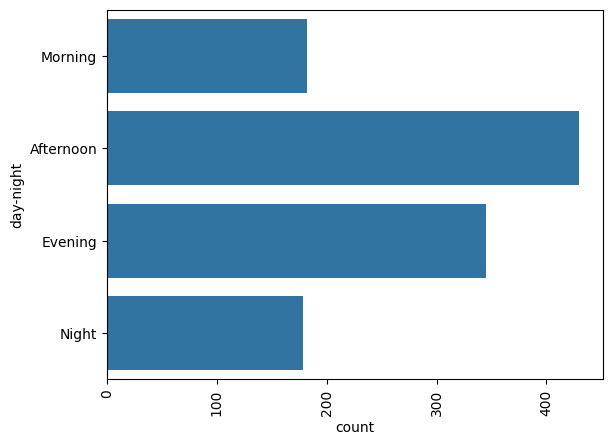

In [ ]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

Now, we will be comparing the two different categories along with the PURPOSE of the user.

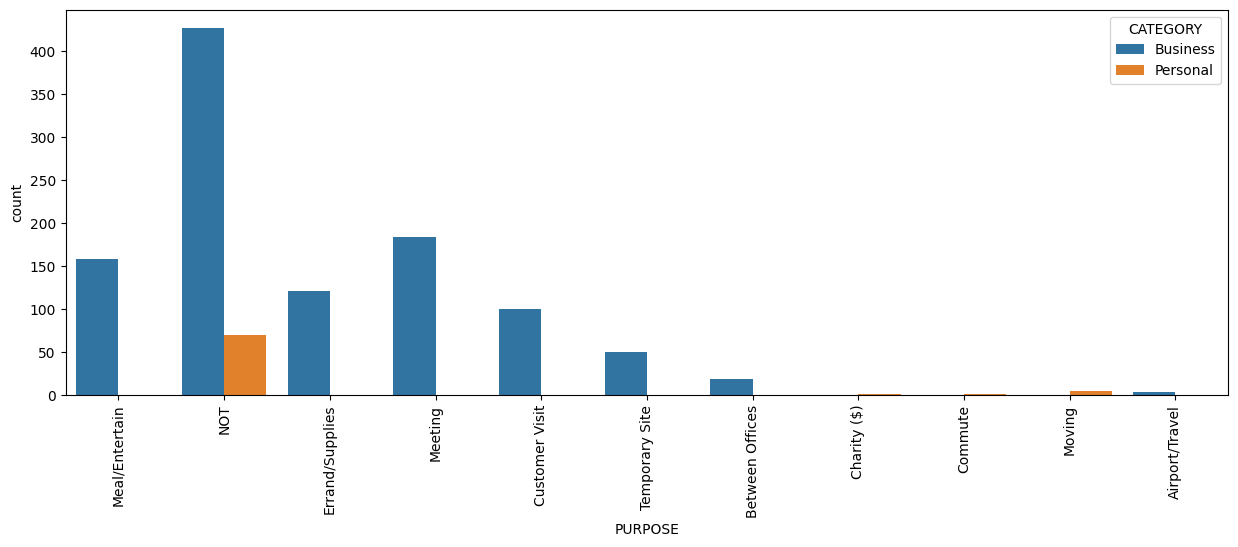

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

As we have seen that CATEGORY and PURPOSE columns are two very important columns. So now we will be using OneHotEncoder to categories them.



In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

After that, we can now find the correlation between the columns using heatmap.

<ipython-input-92-88a85b8628f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

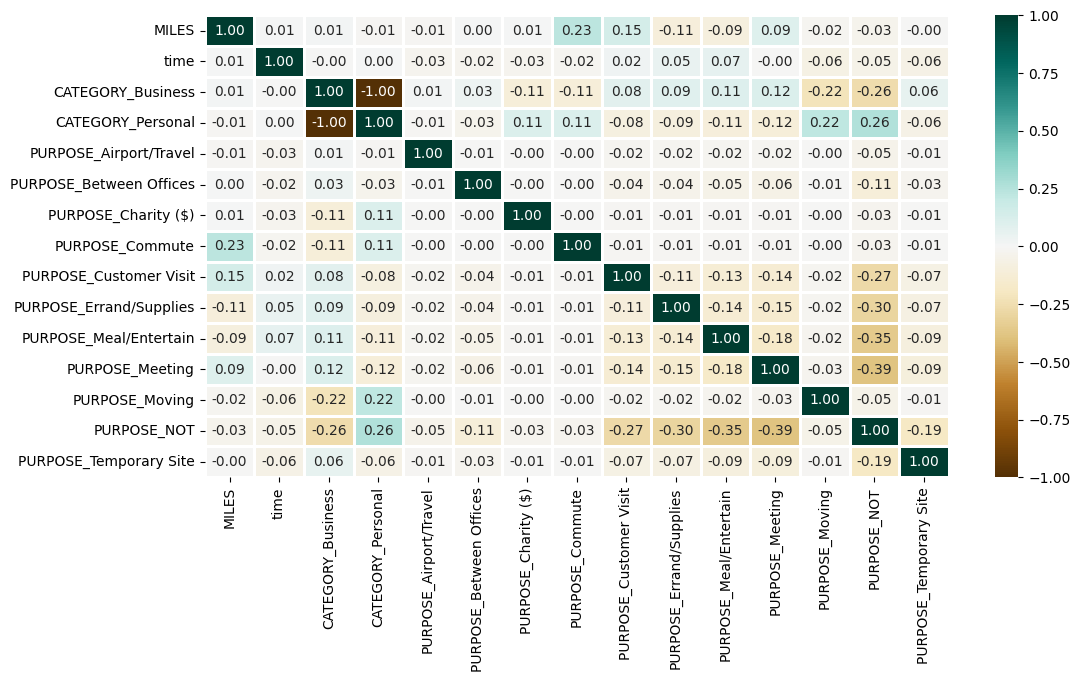

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

The code augments the dataset by creating a 'MONTH' column extracted from the 'START_DATE.' Subsequently, it maps numerical month values to corresponding labels. The resulting visualization compares the total ride counts across different months with the maximum ride count for each month.
This visualization allows for a quick comparison between the total ride counts for each month and the maximum ride count, providing insights into potential trends or peak periods.






[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

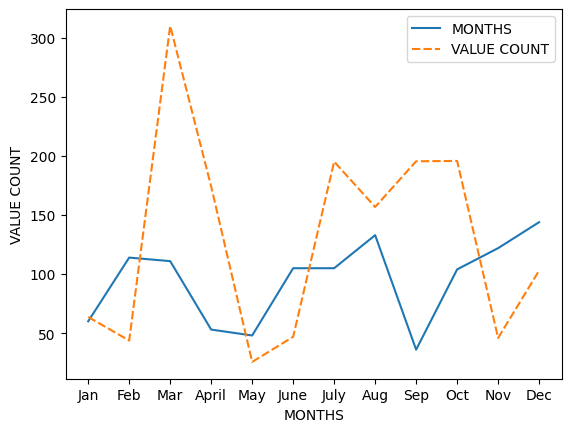

In [ ]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

The code enhances the dataset by incorporating a 'DAY' column derived from the 'START_DATE' using the weekday information. It then maps numerical weekday values to corresponding labels, resulting in a more interpretable representation of days.
This augmentation facilitates a clearer understanding of the dataset, representing days with easily interpretable labels like 'Mon,' 'Tues,' 'Wed,' etc.

In [ ]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

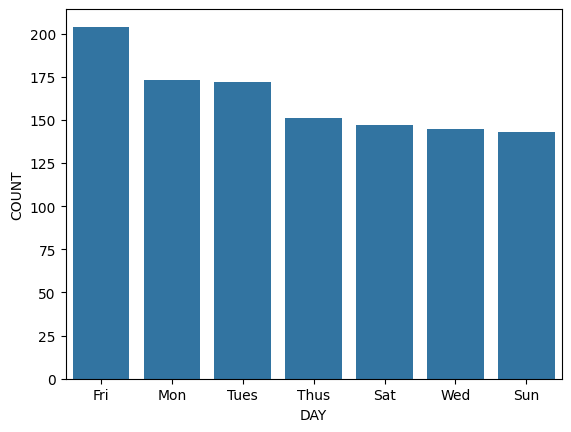

In [ ]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

The given code employs Seaborn to generate a distribution plot (distplot) for the 'MILES' column in the dataset.
This visualization illustrates the distribution of mileages for rides . It offers insights into the frequency and concentration for different distances within the dataset.

<Axes: ylabel='MILES'>

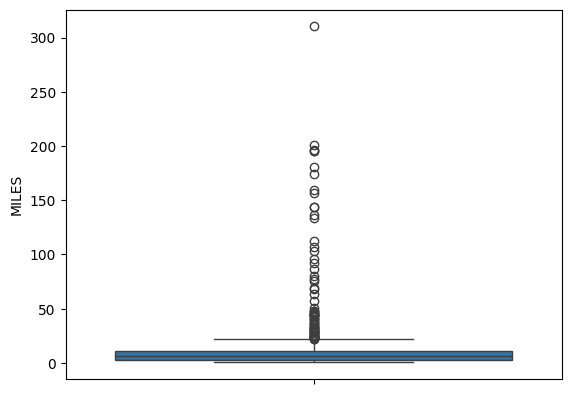

In [ ]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

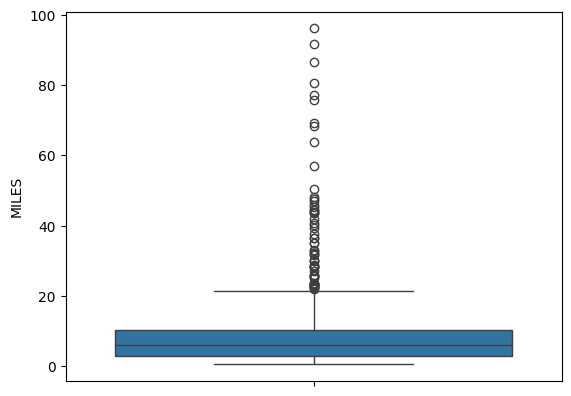

In [ ]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<ipython-input-98-1d5904d4eb1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

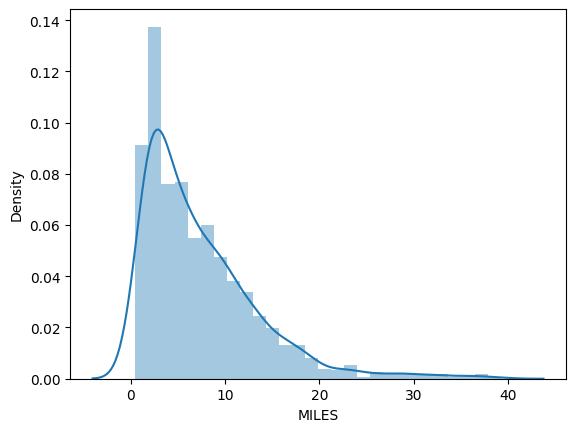

In [ ]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])


# Interpretation

1.   Most of the rides are booked for business purpose.
2.   Most of the people book cabs for Meetings and Meal / Entertain purpose.
3.   Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).
4.   Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
5.   There is not much correlation between the features.
6.   The counts are very irregular.
7.   Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.
8.   Most of the cabs booked for the distance of 4-5 miles.
9.   Majorly people chooses cabs for the distance of 0-20 miles.
10.  For distance more than 20 miles cab counts is nearly negligible.


 # Conclusion
 Analysis of cab booking data reveals key insights into the patterns and preferences of customers. The primary observations include a higher demand for cab services during business hours, with a distinction between bookings for business and personal purposes. The time analysis indicates a peak in bookings from 10 am to 5 pm, while the lack of strong correlations between features suggests a complex interplay of factors influencing cab bookings.

Irregularities in booking counts prompt further investigation to identify contributing factors and optimize resource allocation. Seasonal impact is evident, with a notable decrease in cab counts during the winter months, emphasizing the importance of preparing for and adapting to seasonal variations.

Customers predominantly choose cabs for distances of 0-20 miles, with a specific inclination towards the 4-5 miles range. Understanding the reasons behind these preferences can guide service improvements and marketing strategies. Further exploration into customer behavior, preferences, and the impact of marketing efforts is recommended for a more comprehensive understanding of the dynamics influencing cab bookings.

In conclusion, the analysis provides a foundation for strategic decision-making, suggesting avenues for service optimization, targeted marketing, and adaptation to seasonal trends to meet the evolving demands of customers.